In [2]:
from brownpy import Universe
from brownpy.topology import TDElasticChannel
import matplotlib.pyplot as plt
import numpy as np

In [3]:
seed=0
dt = int(1E6) #fs (1ns) - time steps
D = 1.5E-4 # A²/fs  (1.5E-9 m²/s) - Diffusion coefficient

# Geometry
L = 2*1E4 # A (1um) - reservoir size
H = 2*1E4 # A (1um) - reservoir size
Hc = 1E2 # A (10nm)  - channel height
Lc = 1E3 # A (100nm) - channel length
Rc = 2E2 # A (20nm)  - bottom hole size

N= 32*1024

top = TDElasticChannel(L,H,Lc,Hc,Rc)
u = Universe(top,N,D,dt,output_path='TDElasticChannel.hdf5',overwrite=True, seed=seed)

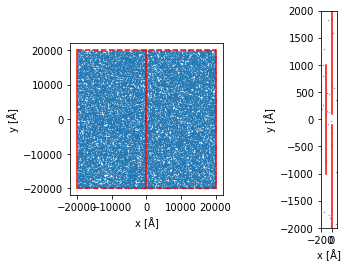

In [3]:
fig, axes = plt.subplots(1,2)
u.plot(axes[0])
# axin = ax.inset_axes([0.8, 0.1, 0.15, 0.15])
ax = axes[1]
u.plot(ax)
ax.set_xlim(-2*Hc, Hc)
ax.set_ylim(-2*Lc, 2*Lc)
ax.set_aspect('equal')

In [4]:
# u.run(1_000_000, freq_dumps=100)
u.run(10_000, freq_dumps=1, seed=seed)

100%|██████████| 10000/10000 [00:11<00:00, 875.31it/s, total=10 µs]

With 32768 particles
------------------------------------------
GPU time per step and per particles:
Allocation: 12.3 ns
Engine: 4.59 ns
Transfert to RAM: 3.22 ns
Total: 20.1 ns
------------------------------------------
CPU time per step and per particles:
Total: 35.3 ns
------------------------------------------
For a timestep of 1 ns
To simulate the trajectory of 1 particle during 1 s, we need 35.3  s


In [5]:
%matplotlib qt
traj = u.f['/run/0/trajectory']
def inside(x,z):
    return (x<=0)*(x>=-Hc)*(np.abs(z)<Lc)
indexes = np.argsort(np.sum(inside(traj[:,0],traj[:,1]), axis=1))[::-1]
fig, ax = plt.subplots(figsize=(10,10))

i = indexes[2]
ax.plot(traj[i,0], traj[i,1])
top.plot(ax)
ax.set_xlim(-2*Lc, 2*Lc)
ax.set_ylim(-2*Lc, 2*Lc)

(-2000.0, 2000.0)

In [10]:
traj.shape

(2048, 2, 10000)

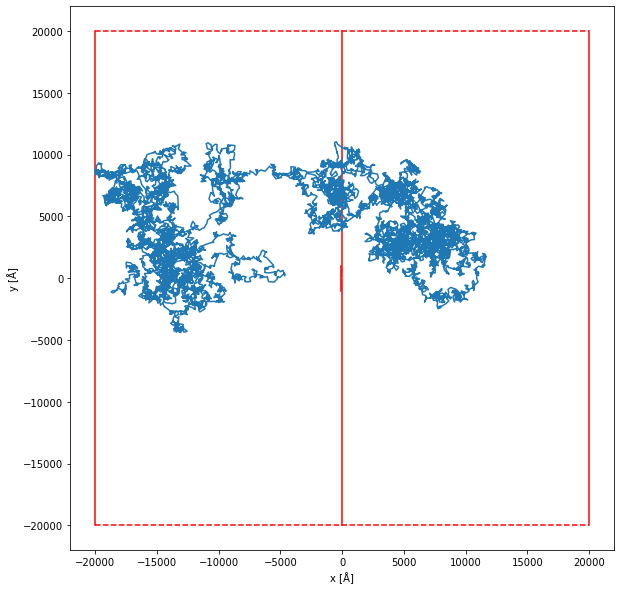

In [28]:
indexes = np.argsort(np.sum(inside(traj[:,0],traj[:,1]), axis=1))[::-1]
fig, ax = plt.subplots(figsize=(10,10))
top.plot(ax)
i = indexes[-1]
ax.plot(traj[i,0], traj[i,1])
# ax.set_xlim(-2*Lc, 2*Lc)
# ax.set_ylim(-2*Lc, 2*Lc)